# stripplot

In [2]:
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
cars = sns.load_dataset('mpg').dropna()

In [5]:
cars.shape

(392, 9)

In [6]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [25]:
sns.set_style('darkgrid')

In [10]:
cars.cylinders.value_counts()

4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64

In [11]:
cars = cars[cars.cylinders.isin([4,6,8])]

In [12]:
cars.cylinders.value_counts()

4    199
8    103
6     83
Name: cylinders, dtype: int64

C:\Users\DESKTOP\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='weight'>

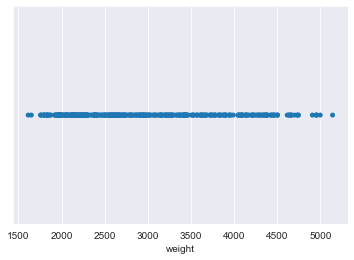

In [32]:
sns.stripplot(cars.weight,
             jitter=False)

<AxesSubplot:xlabel='weight', ylabel='origin'>

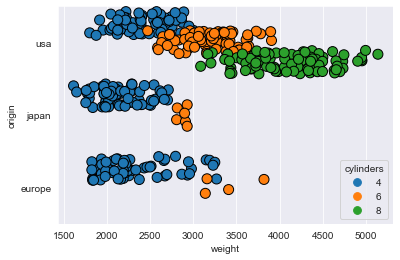

In [41]:
sns.stripplot(x='weight',
              y='origin',
              hue='cylinders',
              dodge=True,
              jitter=0.5,
              alpha=1,
              size=10,
              linewidth=1,
              edgecolor='black',
             data=cars)

In [42]:
%autosave 10

Autosaving every 10 seconds


# scatterplot

In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
dia = sns.load_dataset('diamonds')

In [3]:
dia.shape

(53940, 10)

In [4]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [5]:
dia = dia[dia.cut.isin(['Premium','Good'])&dia.color.isin(['D','F','J'])].sample(n=100)
dia.shape

(100, 10)

In [6]:
sns.set_style('darkgrid')

C:\Users\Public\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='carat', ylabel='price'>

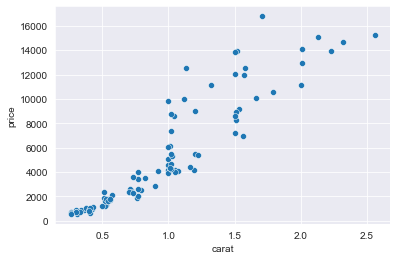

In [7]:
sns.scatterplot(dia.carat,dia.price)

<AxesSubplot:xlabel='carat', ylabel='price'>

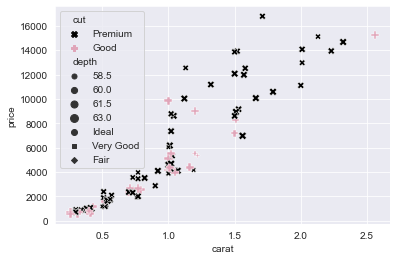

In [24]:
sns.scatterplot(x='carat',
                y='price',
                hue='cut',
                palette=['black','#E0A5B9'],
                hue_order=['Premium','Good'],
                size='depth',
                style='cut',
               data=dia)

# regplot

In [25]:
from matplotlib import pyplot as plt
import seaborn as sns

In [36]:
dia = sns.load_dataset('diamonds').sample(n=200,random_state=44)

In [37]:
dia.shape

(200, 10)

In [38]:
dia.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
40423,0.70,Good,F,I1,63.8,60.0,1134,5.64,5.45,3.54
16309,1.11,Premium,H,VS2,61.1,59.0,6527,6.66,6.63,4.06
3260,0.93,Fair,G,SI1,64.4,57.0,3358,6.14,6.09,3.94
36811,0.30,Premium,G,IF,62.9,58.0,956,4.25,4.21,2.66
48721,0.52,Ideal,G,VVS2,60.8,57.0,2012,5.21,5.16,3.15


<AxesSubplot:xlabel='carat', ylabel='price'>

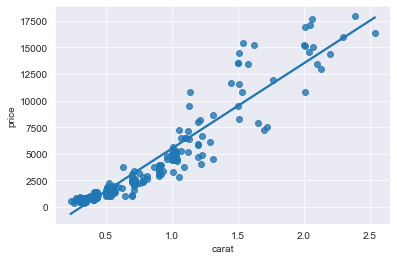

In [42]:
sns.regplot(x='carat',
           y='price',
           data=dia,
           ci=None)

In [43]:
cut_map = {
    'Fair': 1,
    'Good': 2,
    'Very Good': 3,
    'Premium': 4,
    'Ideal': 5
}

dia['cut_value'] = dia.cut.map(cut_map)

In [44]:
dia.cut_value.value_counts()

5    80
4    63
3    39
2    11
1     7
Name: cut_value, dtype: int64

In [45]:
dia.cut_value = dia.cut_value.astype(int)

In [46]:
import numpy as np

<AxesSubplot:xlabel='cut_value', ylabel='price'>

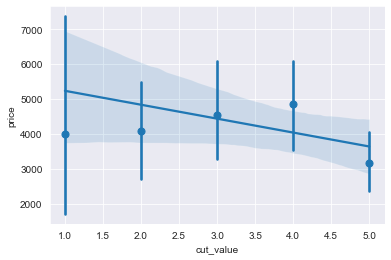

In [48]:
sns.regplot(x='cut_value',
           y='price',
            data=dia,
           x_estimator=np.mean)

<AxesSubplot:xlabel='carat', ylabel='price'>

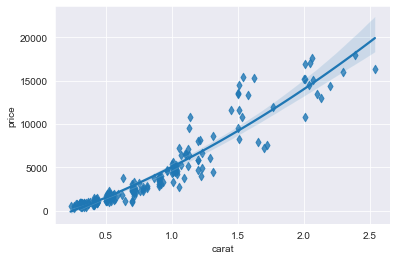

In [58]:
sns.regplot(x='carat',
           y='price',
           data=dia,
           order=2,
           marker='d')

# heatmap

In [1]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np

In [2]:
cars = sns.load_dataset('mpg')

In [3]:
cars.groupby('origin').cylinders.value_counts()

origin  cylinders
europe  4             63
        6              4
        5              3
japan   4             69
        6              6
        3              4
usa     8            103
        6             74
        4             72
Name: cylinders, dtype: int64

In [13]:
new=(cars.groupby('origin').cylinders.value_counts().unstack().fillna(0))

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

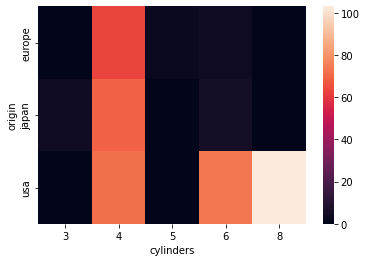

In [15]:
sns.heatmap(new)

<AxesSubplot:xlabel='origin', ylabel='cylinders'>

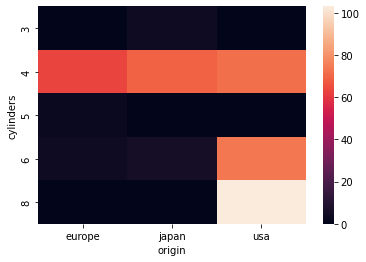

In [16]:
sns.heatmap(new.T)

In [17]:
cars.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year
mpg,1.000000,-0.775396,-0.804203,-0.778427,-0.831741,0.420289,0.579267
cylinders,-0.775396,1.000000,0.950721,0.842983,0.896017,-0.505419,-0.348746
displacement,-0.804203,0.950721,1.000000,0.897257,0.932824,-0.543684,-0.370164
horsepower,-0.778427,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361
weight,-0.831741,0.896017,0.932824,0.864538,1.000000,-0.417457,-0.306564
acceleration,0.420289,-0.505419,-0.543684,-0.689196,-0.417457,1.000000,0.288137
model_year,0.579267,-0.348746,-0.370164,-0.416361,-0.306564,0.288137,1.000000


<AxesSubplot:>

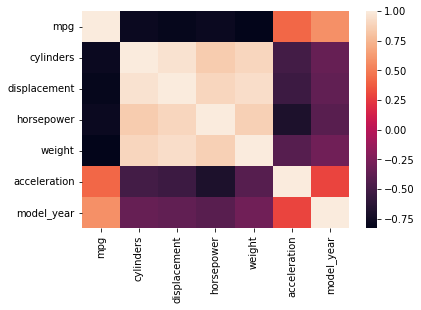

In [18]:
sns.heatmap(cars.corr())

<AxesSubplot:xlabel='cylinders', ylabel='origin'>

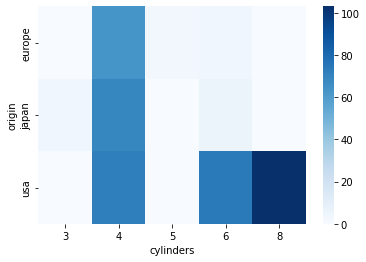

In [25]:
sns.heatmap(new,cmap='Blues')

<AxesSubplot:>

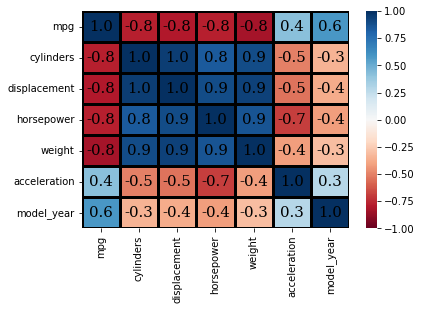

In [45]:
sns.heatmap(cars.corr(),
            cmap='RdBu',
            center=0,
           vmin=-1,
           vmax=1,
           annot=True,
           fmt='.1f',
            annot_kws={
                'fontsize': 15,
                'fontweight': 'light',
                'fontfamily': 'serif',
                'color': 'black'},
           linewidths=3,
           linecolor='black',
           )

In [46]:
labels = ['hady', 'hady', 'hady', 'hady','hady', 'hady', 'hady']

<AxesSubplot:>

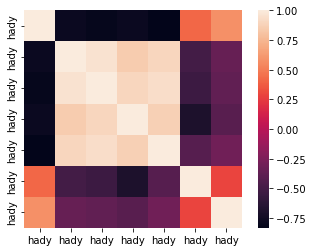

In [53]:
sns.heatmap(cars.corr(),
           xticklabels=labels,
           yticklabels=labels,
           square=True)

# clustermap

In [54]:
import seaborn as sns

from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [58]:
peng = sns.load_dataset('penguins').dropna()

In [59]:
num = peng.columns[2:6]

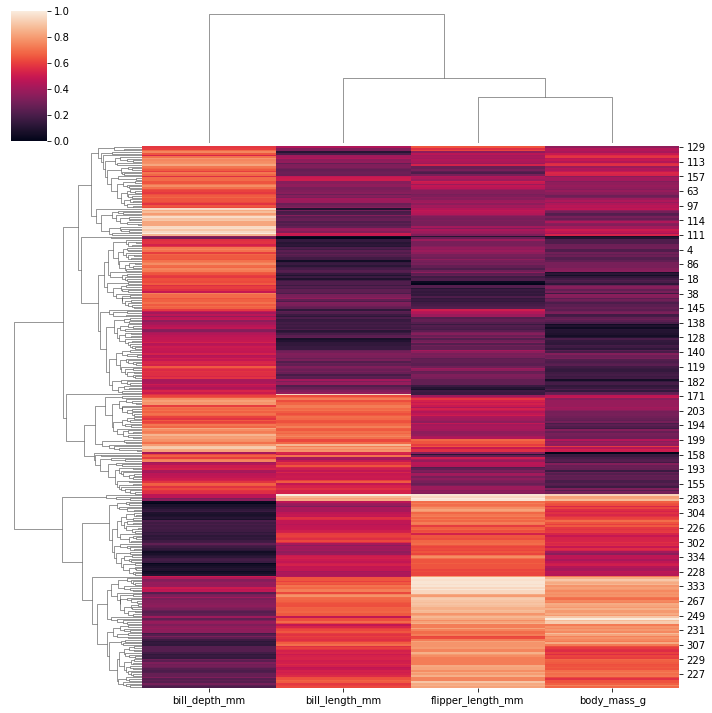

In [63]:
sns.clustermap(peng[num],
              standard_scale=1);

In [65]:
species_colors=peng.species.map({
    'Adelie': 'blue',
    'Chinstrap': 'red',
    'Gentoo': 'green'
})

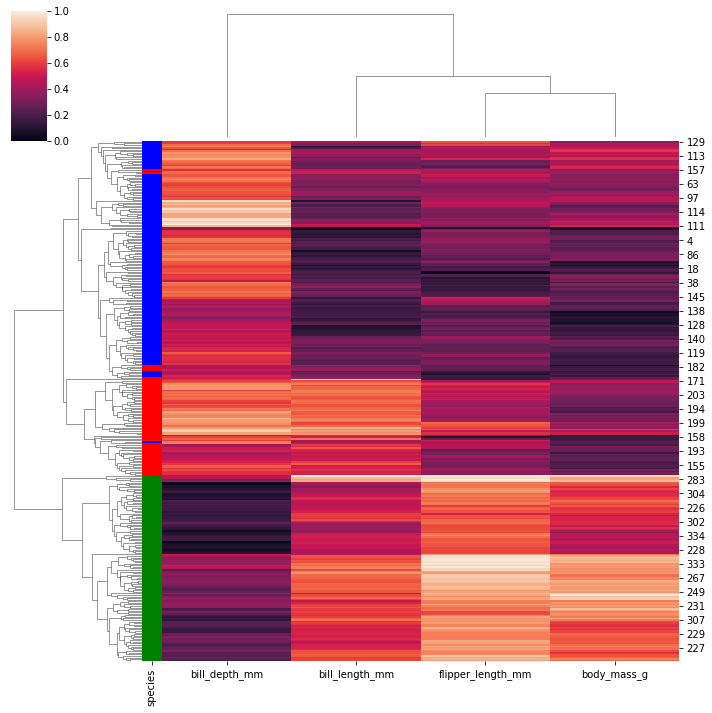

In [66]:
sns.clustermap(peng[num], standard_scale=1, row_colors=species_colors);

# barplot

In [1]:
import seaborn as sns

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

In [5]:
peng = sns.load_dataset('penguins')

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

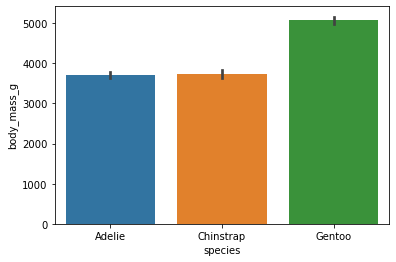

In [10]:
sns.barplot(x='species',
            y='body_mass_g',
            data=peng)

<AxesSubplot:xlabel='body_mass_g', ylabel='species'>

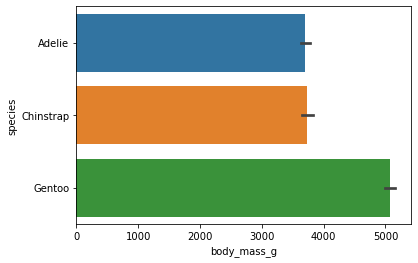

In [11]:
sns.barplot(x='body_mass_g',
            y='species',
            data=peng)

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

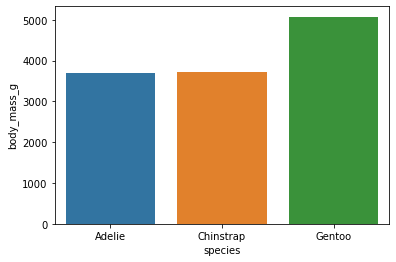

In [12]:
sns.barplot(x='species',
            y='body_mass_g', 
            data=peng,
            ci=None
           )

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

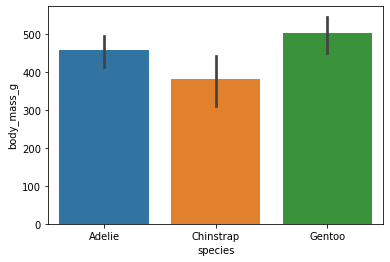

In [13]:
sns.barplot(x='species',
            y='body_mass_g', 
            data=penguins,
            estimator=np.std
           )

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

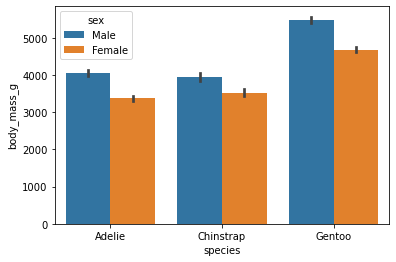

In [14]:
sns.barplot(x='species',
            y='body_mass_g', 
            data=peng,
            hue='sex'
           )

<AxesSubplot:xlabel='species', ylabel='body_mass_g'>

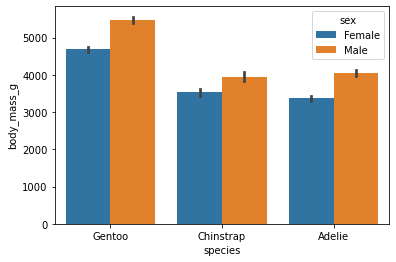

In [18]:
sns.barplot(x='species',
            y= 'body_mass_g', 
            data=peng,
            hue='sex',
            order=['Gentoo', 'Chinstrap', 'Adelie'],
            hue_order=['Female', 'Male'],
           )

# countplot

In [19]:
import seaborn as sns

In [20]:
diamonds = sns.load_dataset('diamonds')

In [21]:
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [22]:
diamonds = diamonds[diamonds.clarity.isin(['SI1', 'VS2'])]

<AxesSubplot:xlabel='color', ylabel='count'>

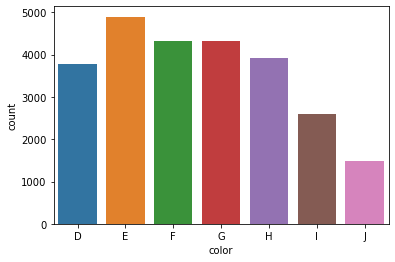

In [26]:
sns.countplot(x='color',
              data=diamonds)

<AxesSubplot:xlabel='count', ylabel='color'>

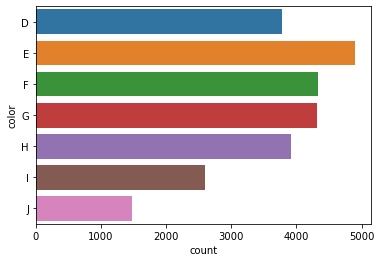

In [25]:
sns.countplot(y='color',
              data=diamonds)

In [27]:
diamonds.color.cat.categories

Index(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype='object')

<AxesSubplot:xlabel='color', ylabel='count'>

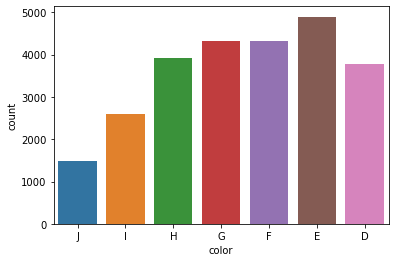

In [30]:
color_order=['J', 'I', 'H', 'G', 'F', 'E', 'D']

sns.countplot(x='color',
              data=diamonds,
              order=color_order)

<AxesSubplot:xlabel='color', ylabel='count'>

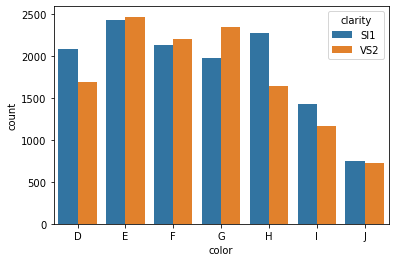

In [31]:
sns.countplot(x='color',
              data=diamonds,
              hue='clarity',
              hue_order=['SI1', 'VS2'])

<AxesSubplot:xlabel='color', ylabel='count'>

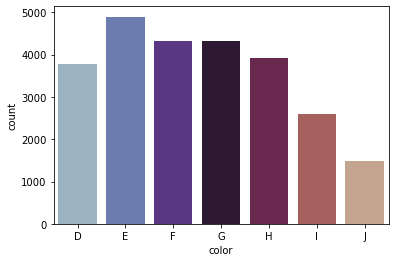

In [32]:
sns.countplot(x='color',
              data=diamonds,
              palette='twilight')

<AxesSubplot:xlabel='color', ylabel='count'>

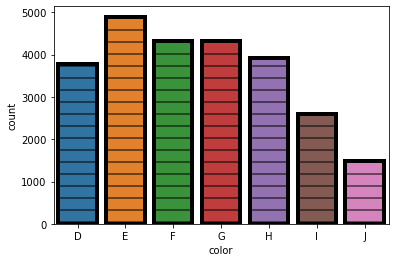

In [33]:
sns.countplot(x='color',
              data=diamonds,
              lw=4,
              ec='black',
              hatch='-'
             )

# jointplot

In [34]:
import seaborn as sns

from matplotlib import pyplot as plt
import matplotlib

In [35]:
geyser = sns.load_dataset('geyser')

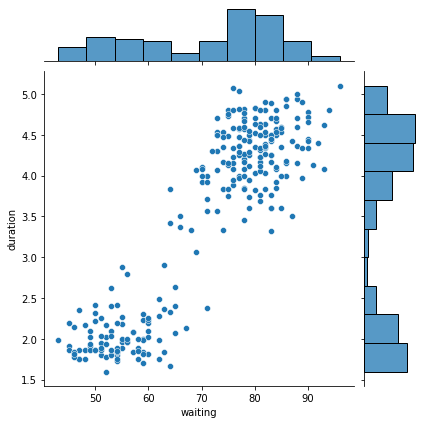

In [38]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser)

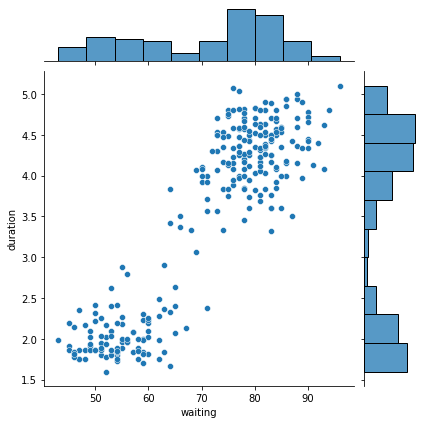

In [39]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              kind='scatter'
             )

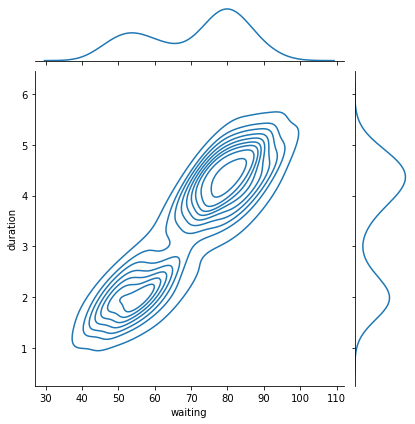

In [40]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              kind='kde'
             )

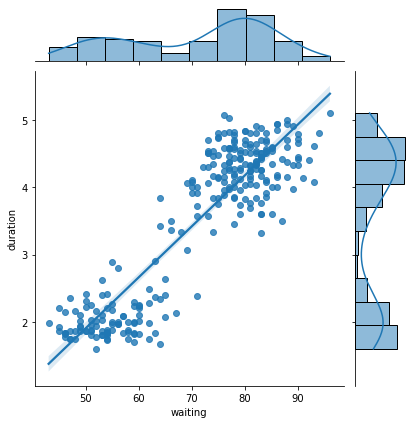

In [41]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              kind='reg'
             )

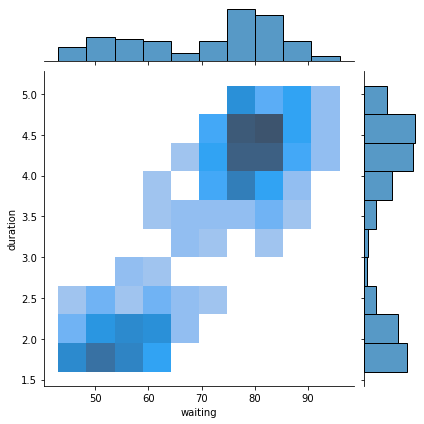

In [42]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              kind='hist'
             )

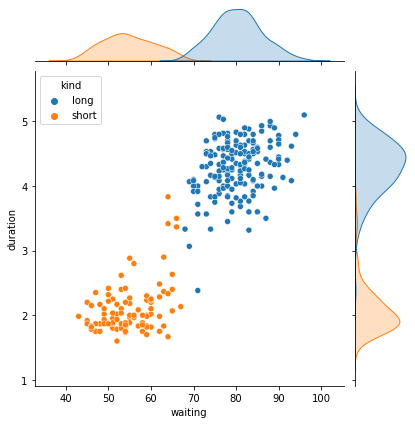

In [43]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              hue='kind'
             )

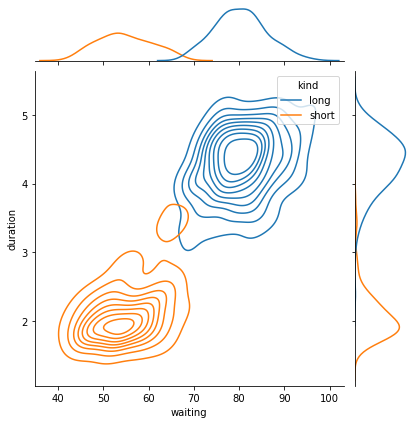

In [44]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              hue='kind',
              kind='kde'
             )

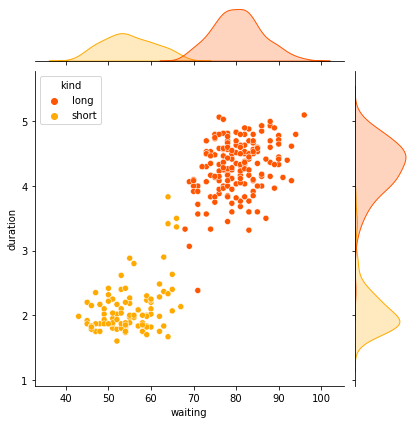

In [45]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              hue='kind',
              palette='autumn'
             )

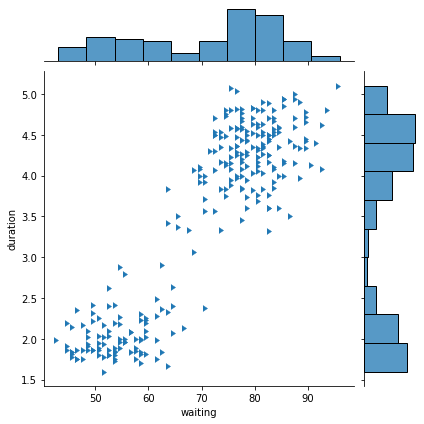

In [48]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              joint_kws={'marker': 5}
             )

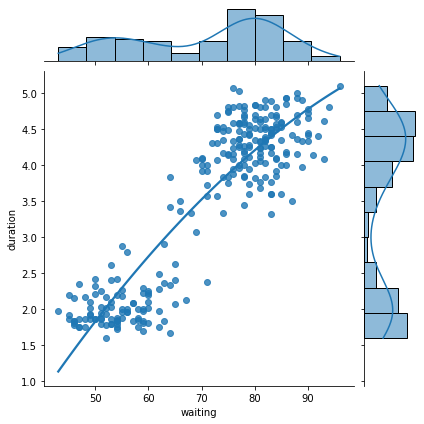

In [51]:
sns.jointplot(x='waiting', 
              y='duration',
              data=geyser,
              kind='reg',
              joint_kws={'ci': None, 'order': 2}
             )

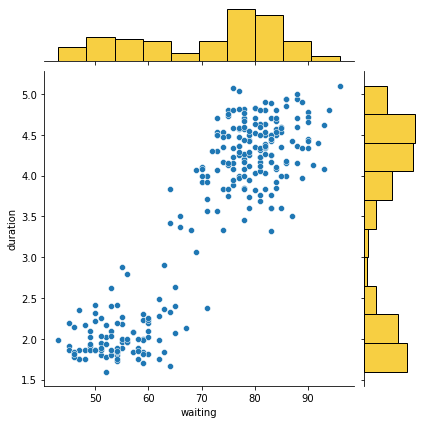

In [49]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              marginal_kws={'color': 'xkcd:golden'}
             )

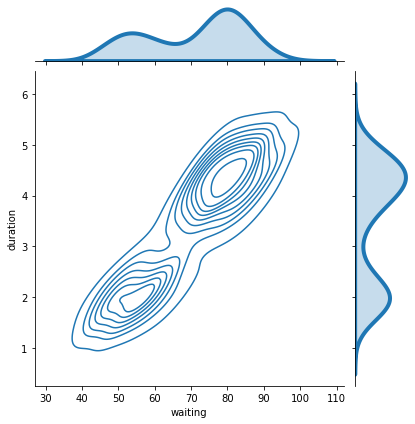

In [50]:
sns.jointplot(x='waiting',
              y='duration',
              data=geyser,
              kind='kde',
              marginal_kws={'lw': 4, 'shade': True}
             )

# catplot

In [52]:
import seaborn as sns

In [53]:
cars = sns.load_dataset('mpg').dropna()

cars = cars[cars.cylinders.isin([4, 6, 8])] 

cars['type'] = ['old' if x <=76 else 'new' for x in cars.model_year]

In [54]:
cars.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,type
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu,old
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320,old
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite,old
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst,old
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino,old


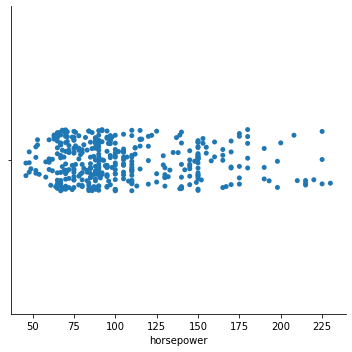

In [55]:
sns.catplot(x='horsepower',
            data=cars)

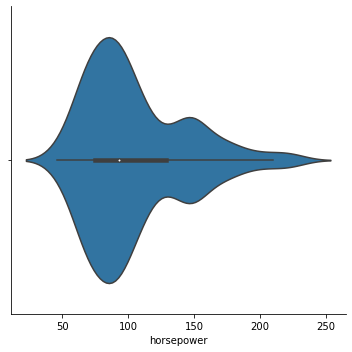

In [59]:
sns.catplot(x='horsepower',
            data=cars,
            kind='violin')

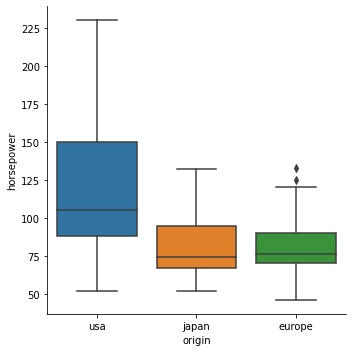

In [60]:
sns.catplot(x='origin',
            y='horsepower', 
            data=cars, 
            kind='box')

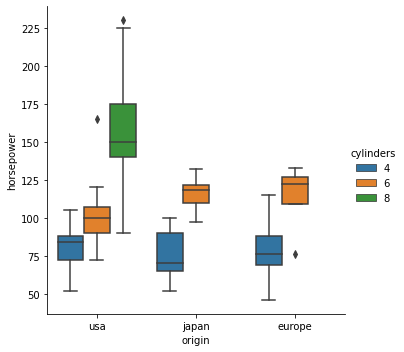

In [61]:
sns.catplot(x='origin',
            y='horsepower', 
            data=cars, 
            hue='cylinders',
            kind='box')

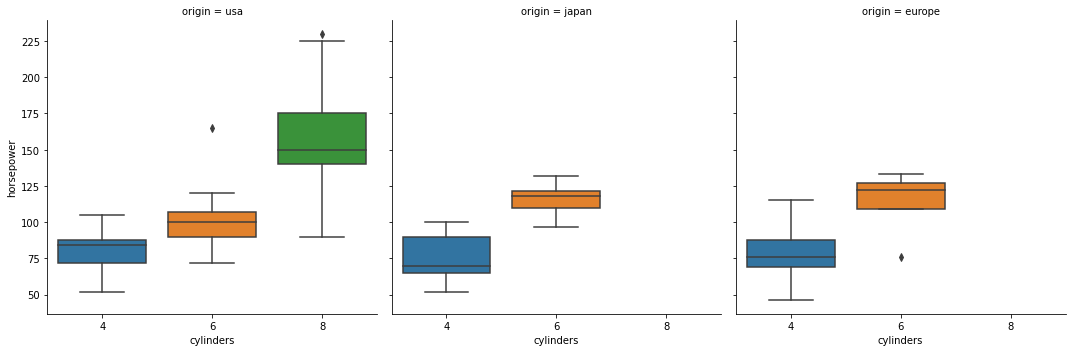

In [62]:
sns.catplot(x='cylinders',
            y='horsepower', 
            data=cars, 
            kind='box',
            col='origin'
           )

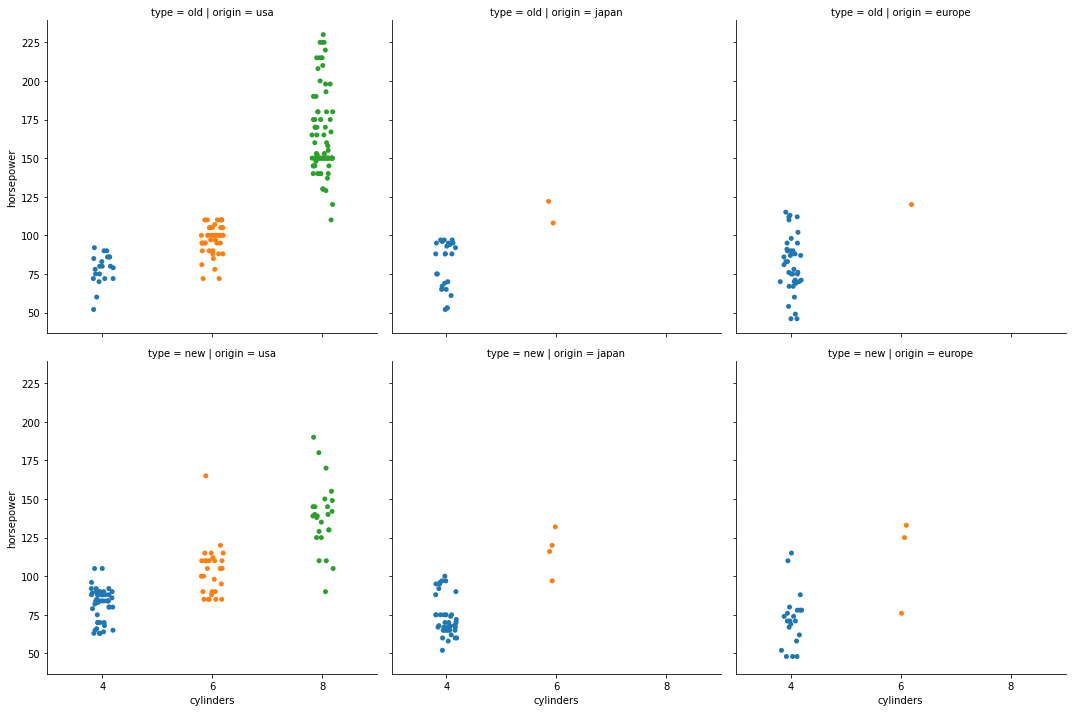

In [63]:
sns.catplot(x='cylinders',
            y='horsepower', 
            data=cars, 
            kind='strip',
            col='origin',
            row='type'
           )